In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
data_dir = r'../../Downloads/solar panels/'

In [3]:
os.listdir(data_dir + 'clean')[0]

'Imgclean_0_0.jpg'

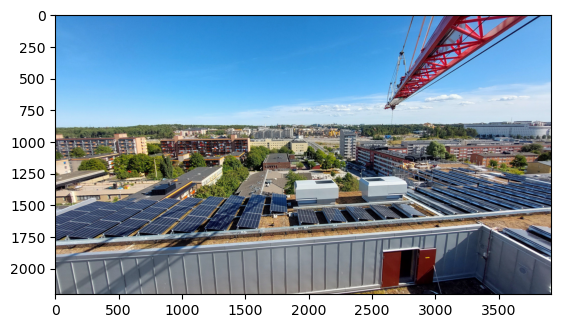

In [4]:
clean_im = data_dir + 'clean/Imgclean_0_0.jpg'
plt.imshow(imread(clean_im))

In [5]:
os.listdir(data_dir + 'dusty')[0]

'Imgdirty_0_1.jpg'

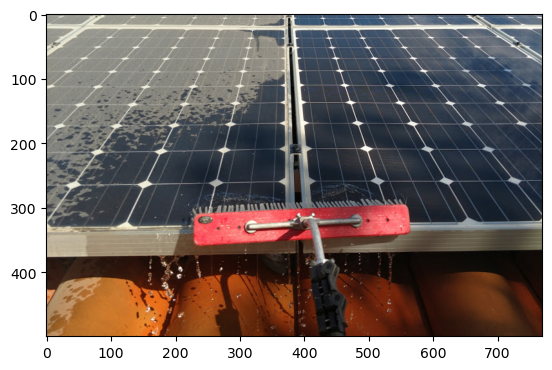

In [6]:
dirty_im = data_dir+'dusty/Imgdirty_0_1.jpg'
plt.imshow(imread(dirty_im))

In [7]:
print(f'Size of clean images: {len(os.listdir(data_dir+'clean'))}')
print(f'Size of dirty images: {len(os.listdir(data_dir+'dusty'))}')

Size of clean images: 1493
Size of dirty images: 1069


In [8]:
imread(dirty_im).shape

(500, 770, 3)

In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [10]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(227,227),
    batch_size=16,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(227,227),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    shuffle=False,
    seed=42)

Found 2051 images belonging to 2 classes.
Found 511 images belonging to 2 classes.


In [18]:
train_generator.class_indices

{'clean': 0, 'dusty': 1}

In [12]:
inputs = Input(shape=(227, 227, 3))

x = Conv2D(96, kernel_size=(11,11), strides=4)(inputs)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(256, kernel_size=(5,5), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(384, kernel_size=(3,3), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(384, kernel_size=(3,3), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(256, kernel_size=(3,3), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 55, 55, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 58,290,945 (222.36 MB)

 Trainable params: 58,288,193 (222.35 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [21]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [14]:
result = model.fit(train_generator, epochs = 50, validation_data = test_generator)

C:\Users\KI\anaconda3\envs\myEnv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 31/129 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - accuracy: 0.5338 - loss: 17.4492

C:\Users\KI\anaconda3\envs\myEnv\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.5409 - loss: 12.1514 - val_accuracy: 0.5264 - val_loss: 3.3667
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.5654 - loss: 1.5054 - val_accuracy: 0.4638 - val_loss: 1.2097
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.6317 - loss: 0.8096 - val_accuracy: 0.5793 - val_loss: 0.7347
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.6509 - loss: 0.7267 - val_accuracy: 0.6869 - val_loss: 0.6991
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.6836 - loss: 0.7205 - val_accuracy: 0.6712 - val_loss: 0.7064
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.6579 - loss: 0.7161 - val_accuracy: 0.6223 - val_loss: 1.3188
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.6601 - loss: 0.6994 - val_accuracy: 0.6654 - val_loss: 0.6899
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.6525 - loss: 0.7421 - val_accuracy: 0.68

Text(0.5, 1.0, 'Loss over Epochs')

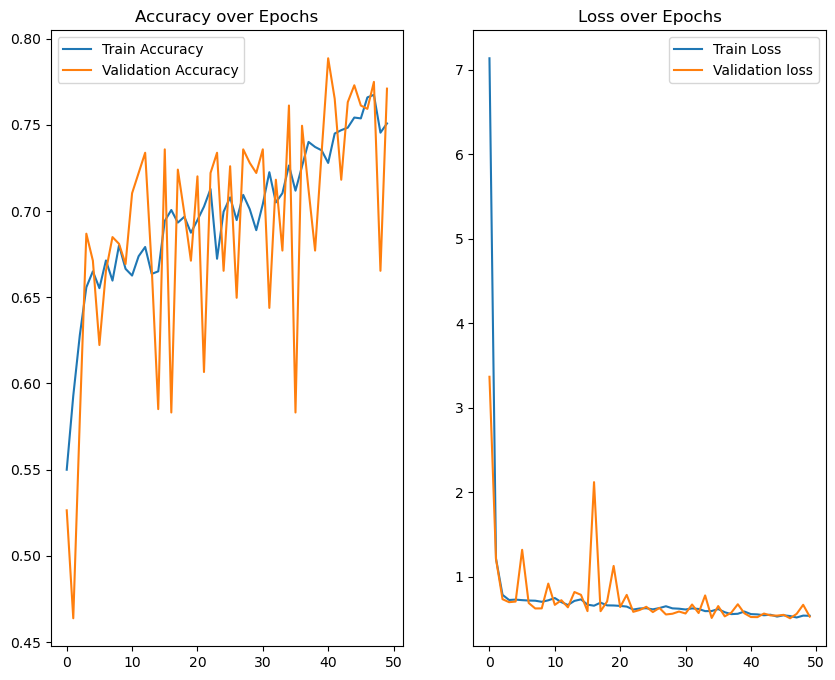

In [15]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(result.history['accuracy'],label='Train Accuracy')
plt.plot(result.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')


plt.subplot(1,2,2)
plt.plot(result.history['loss'],label='Train Loss')
plt.plot(result.history['val_loss'],label='Validation loss')
plt.legend()
plt.title('Loss over Epochs')

In [16]:
pred_probabilities = model.predict(test_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 816ms/step


In [17]:
predictions = pred_probabilities > 0.5

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_generator.classes,predictions))
print(confusion_matrix(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       298
           1       0.75      0.61      0.67       213

    accuracy                           0.75       511
   macro avg       0.75      0.73      0.74       511
weighted avg       0.75      0.75      0.75       511

[[255  43]
 [ 83 130]]


In [27]:
from tensorflow.keras.applications import Xception
input_tensor = Input(shape=(224, 224, 3))
base_model = Xception(include_top=False, weights='imagenet', input_tensor= input_tensor)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)
mcd_model = Model(inputs= input_tensor, outputs=output)

mcd_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
mcd_train_generator=datagen.flow_from_directory(data_dir,
                                                   target_size=(224,224),
                                                   batch_size=16,
                                                   shuffle=True,
                                                   color_mode='rgb',
                                                   subset='training',
                                                   class_mode='binary')

mcd_test_generator=datagen.flow_from_directory(data_dir,
                                                   target_size=(224,224),
                                                   batch_size=16,
                                                   shuffle=False,
                                                   color_mode='rgb',
                                                   subset = 'validation',
                                                   class_mode='binary')

Found 2051 images belonging to 2 classes.
Found 511 images belonging to 2 classes.


In [29]:
mcd_result = mcd_model.fit(mcd_train_generator, epochs = 50, callbacks = [early_stop], validation_data = mcd_test_generator)

C:\Users\KI\anaconda3\envs\myEnv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
  6/129 ━━━━━━━━━━━━━━━━━━━━ 8:00 4s/step - accuracy: 0.5003 - loss: 0.6847    

C:\Users\KI\anaconda3\envs\myEnv\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 549s 4s/step - accuracy: 0.6458 - loss: 0.6344 - val_accuracy: 0.7221 - val_loss: 1.3336
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 537s 4s/step - accuracy: 0.7787 - loss: 0.5464 - val_accuracy: 0.4775 - val_loss: 3.3417
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 525s 4s/step - accuracy: 0.7811 - loss: 0.5048 - val_accuracy: 0.7554 - val_loss: 2.9132


Text(0.5, 1.0, 'Loss over Epochs')

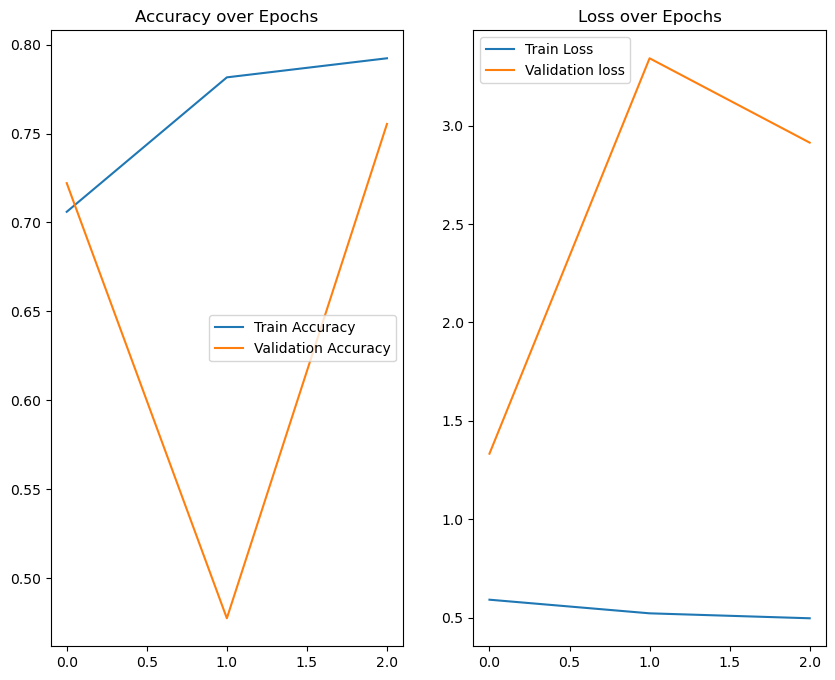

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(mcd_result.history['accuracy'],label='Train Accuracy')
plt.plot(mcd_result.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')


plt.subplot(1,2,2)
plt.plot(mcd_result.history['loss'],label='Train Loss')
plt.plot(mcd_result.history['val_loss'],label='Validation loss')
plt.legend()
plt.title('Loss over Epochs')

In [31]:
mcd_pred_probabilities = mcd_model.predict(mcd_test_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step   


In [32]:
mcd_predictions = mcd_pred_probabilities > 0.5

In [33]:
print(classification_report(test_generator.classes,predictions))
print(confusion_matrix(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       298
           1       0.81      0.39      0.53       213

    accuracy                           0.71       511
   macro avg       0.75      0.66      0.66       511
weighted avg       0.74      0.71      0.68       511

[[279  19]
 [130  83]]


In [20]:
from tensorflow.keras.models import load_model
model.save('CNN_model_solar.h5')

In [21]:
model_features = Model(inputs=model.input, outputs=model.layers[-3].output)

X_train = model_features.predict(train_generator)
X_test = model_features.predict(test_generator)
y_train = train_generator.classes
y_test = test_generator.classes

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C = [0.01,0.1,1,10]
for c in C:
    svm = SVC(kernel='rbf', C=c, probability = True, class_weight = 'balanced')
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    print(f'C: {c}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('--------------------------------------------------')

  9/129 ━━━━━━━━━━━━━━━━━━━━ 1:32 767ms/step

C:\Users\KI\anaconda3\envs\myEnv\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 108s 828ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 676ms/step
C: 0.01
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       298
           1       0.42      1.00      0.59       213

    accuracy                           0.42       511
   macro avg       0.21      0.50      0.29       511
weighted avg       0.17      0.42      0.25       511

[[  0 298]
 [  0 213]]
--------------------------------------------------


C:\Users\KI\anaconda3\envs\myEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KI\anaconda3\envs\myEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KI\anaconda3\envs\myEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C: 0.1
              precision    recall  f1-score   support

           0       0.64      0.69      0.67       298
           1       0.52      0.47      0.49       213

    accuracy                           0.60       511
   macro avg       0.58      0.58      0.58       511
weighted avg       0.59      0.60      0.59       511

[[205  93]
 [113 100]]
--------------------------------------------------
C: 1
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       298
           1       0.48      0.44      0.46       213

    accuracy                           0.57       511
   macro avg       0.55      0.55      0.55       511
weighted avg       0.56      0.57      0.57       511

[[198 100]
 [120  93]]
--------------------------------------------------
C: 10
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       298
           1       0.44      0.40      0.42       213

    accuracy    